# Градиентный бустинг (Классификация)

Проведите классификацию методом Градиентного бустинга. Обратите внимание на подбор гиперпараметров алгоритма. Качество оценить минимум по 3 критериям качества для классификации: *confusion_matrix, accuracy, precision, recall, f1_score, roc_auc*.

**Dataset Description:**

- age : возраст (разница в 5 лет)
- height(cm) : рост (см)
- weight(kg) : вес (кг)
- waist(cm) : длина окружности талии (см)
- eyesight(left) : зрение (слева)
- eyesight(right) : зрение (справа)
- hearing(left) : слух (слева)
- hearing(right) : слух (справа)
- systolic : давление в артериях при сокращении сердца
- relaxation : давление в артериях при расслаблении
- fasting blood sugar : уровень сахара в крови натощак
- Cholesterol : общий уровень холестерина
- triglyceride : это тип жира, называемого липидами, который циркулирует в крови
- HDL : холестерин ЛПВП (липопротеины высокой плотности), иногда называемый «хорошим» холестерином, поглощает холестерин в крови и переносит его обратно в печень
- LDL : холестерин ЛПНП (липопротеины низкой плотности), иногда называемый «плохим» холестерином, составляет большую часть холестерина в вашем организме. Высокий уровень холестерина ЛПНП повышает риск сердечных заболеваний и инсульта
- hemoglobin : гемоглобин, белок, содержащийся в эритроцитах, который отвечает за доставку кислорода к тканям
- Urine protein : анализ на белок в моче измеряет белок в моче (моче), и большое его количество указывает на проблемы с почками.
- serum creatinine : продукт жизнедеятельности, вырабатываемый мышцами и отфильтровываемый почками. Большое его количество указывает на проблемы с почками
- AST : тип глутаминово-щавелево-уксусной трансаминазы. Слишком большое количество указывает на повреждение печени
- ALT : тип глутаминово-щавелево-уксусной трансаминазы. повышенный уровень АЛТ часто является признаком заболевания печени.
- Gtp : γ-GTP. Гамма-глютамилтранспептидаза – фермент (белок) печени и поджелудочной железы, активность которого в крови повышается при заболеваниях печени и злоупотреблении алкоголем.
- dental caries : кариес
- smoking : целевая переменная - курение

## Импортируем данные

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score, roc_auc_score, \
                            confusion_matrix, precision_score, recall_score, \
                            roc_curve, f1_score, ConfusionMatrixDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('train_dataset.csv')
data.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,97,239,153,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,88,211,128,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,80,193,120,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,249,210,366,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,100,179,200,47,92,14.9,1,1.2,26,28,15,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

## Проведем EDA (Exploratory Data Analysis) - первичный анализ данных

Все данные в нашем датасете имеют числовое значение.

In [4]:
def eda_info(df):
    x = pd.DataFrame(
        {
            "Доля пропусков": df.isnull().mean(),
            "Минимальное значение": df.min(),
            "Максимальное значение": df.max(),
            "Среднее значение": df.mean(),
            "Медиана": df.median(),
            "Дисперсия": df.var(),
            "Квантиль 0.1": df.quantile(0.1),
            "Квантиль 0.9": df.quantile(0.9),
            "Квартиль 1": df.quantile(0.25),
            "Квартиль 3": df.quantile(0.75)
        }
    )

    return x

In [5]:
col_num = data.select_dtypes(include=["number"]).columns
eda_info(data[col_num])

,Доля пропусков,Минимальное значение,Максимальное значение,Среднее значение,Медиана,Дисперсия,Квантиль 0.1,Квантиль 0.9,Квартиль 1,Квартиль 3
age,0.0,20.0,85.0,44.127591,40.0,145.529573,30.0,60.0,40.0,55.0
height(cm),0.0,130.0,190.0,164.689488,165.0,84.410288,150.0,175.0,160.0,170.0
weight(kg),0.0,30.0,135.0,65.938718,65.0,166.321797,50.0,85.0,55.0,75.0
waist(cm),0.0,51.0,129.0,82.062115,82.0,86.989160,70.0,94.0,76.0,88.0
eyesight(left),0.0,0.1,9.9,1.014955,1.0,0.248529,0.6,1.5,0.8,1.2
eyesight(right),0.0,0.1,9.9,1.008768,1.0,0.243851,0.6,1.5,0.8,1.2
hearing(left),0.0,1.0,2.0,1.025369,1.0,0.024726,1.0,1.0,1.0,1.0
hearing(right),0.0,1.0,2.0,1.026190,1.0,0.025505,1.0,1.0,1.0,1.0
systolic,0.0,71.0,233.0,121.475631,120.0,186.145675,104.0,138.0,112.0,130.0
relaxation,0.0,40.0,146.0,75.994408,76.0,93.291147,64.0,88.0,70.0,82.0


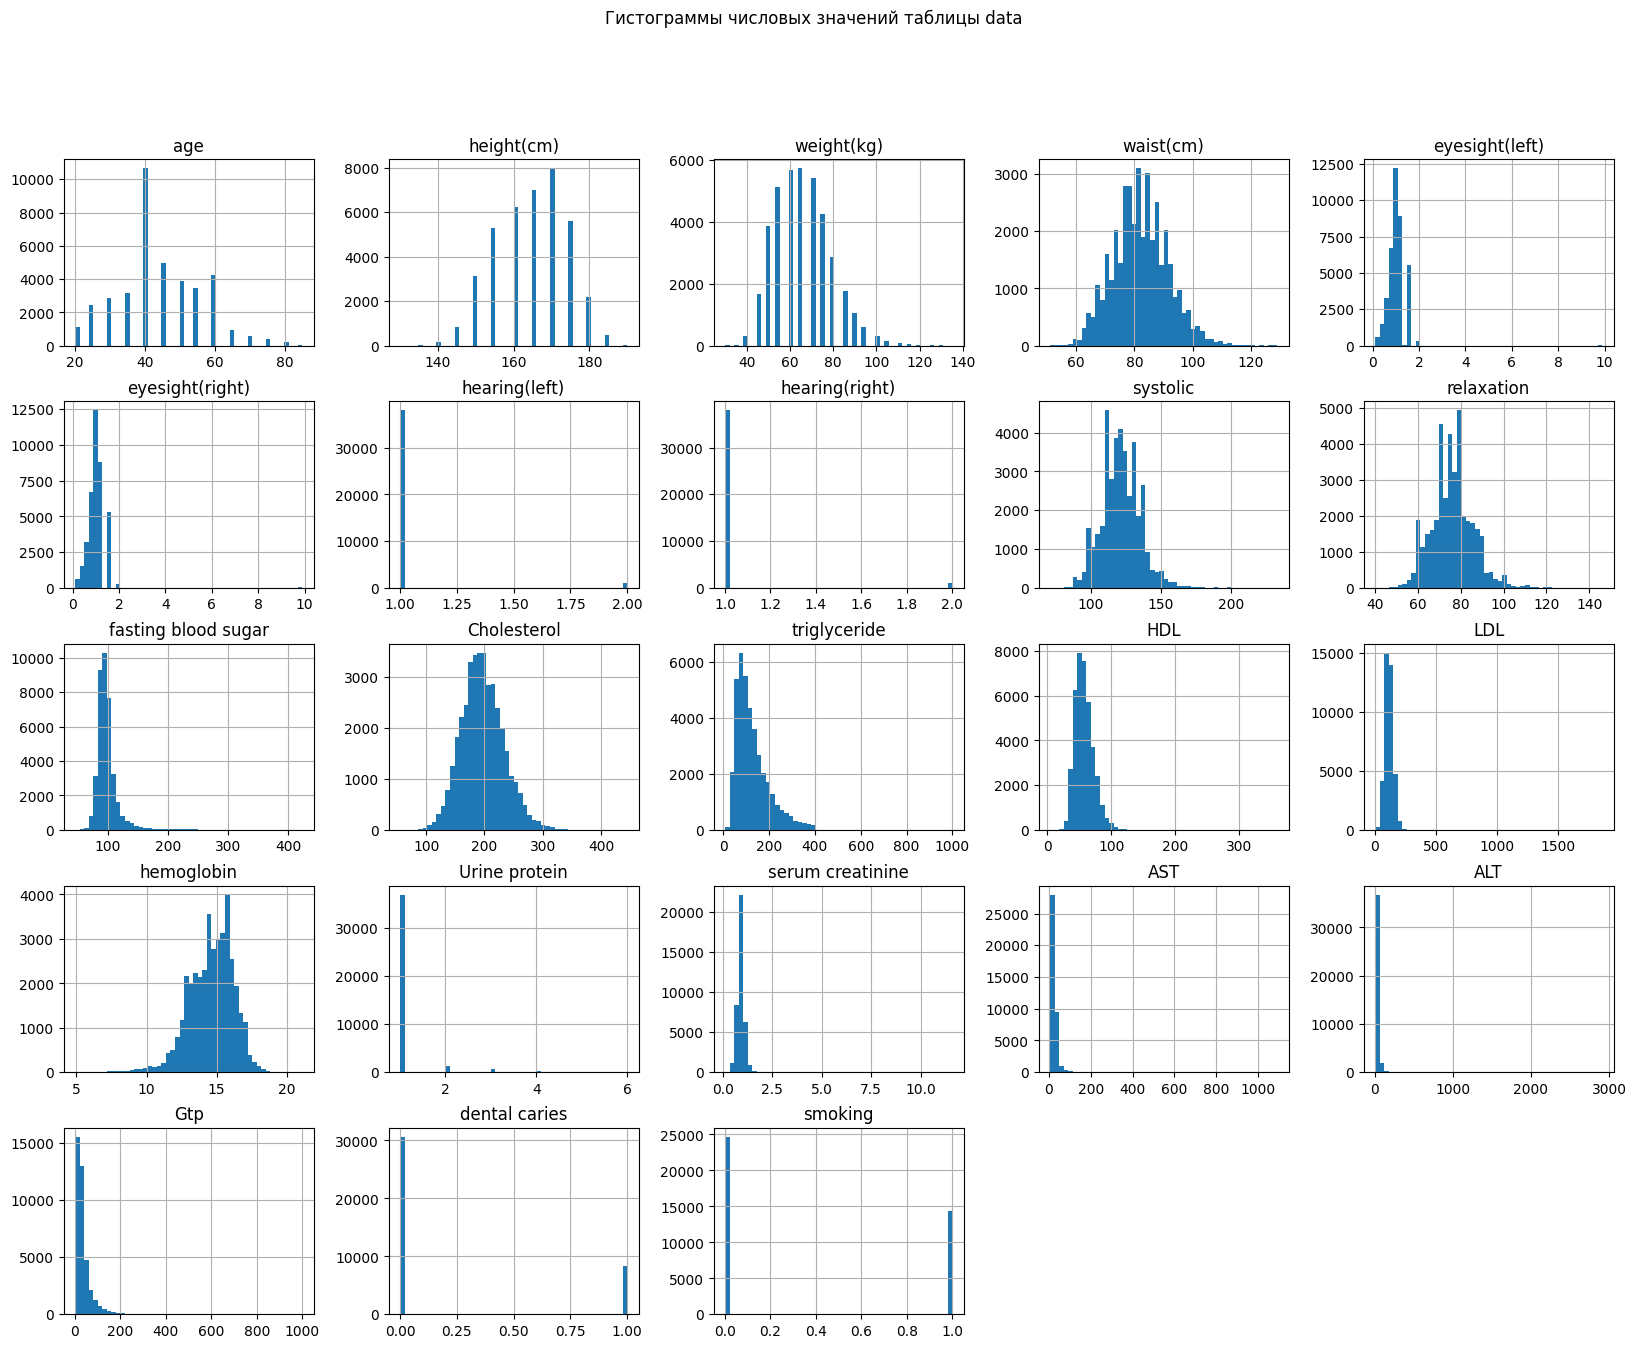

In [6]:
data.hist(bins=50, figsize=(20, 15))
plt.suptitle("Гистограммы числовых значений таблицы data")
plt.show()

## Рассмотрим целевой признак `smoking`

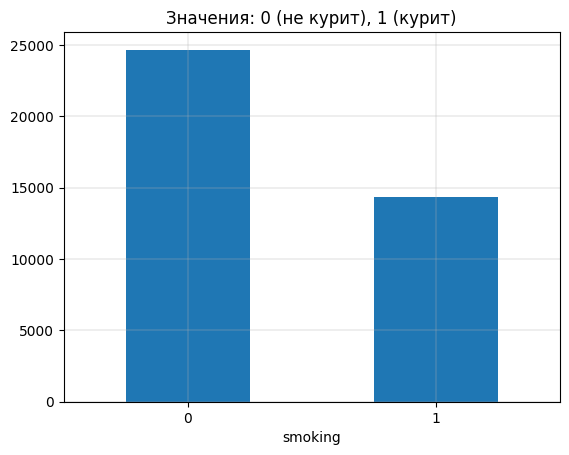

In [7]:
data['smoking'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=0)
plt.grid(linewidth=0.3)
plt.title('Значения: 0 (не курит), 1 (курит)')
plt.show()

In [8]:
smoking_ratio = data['smoking'].mean()
print(f"Доля курящих (smoking = 1): {smoking_ratio:.2f}")

Доля курящих (smoking = 1): 0.37


Есть небольшой дисбаланс данных, учтем его в будущем при построении модели.

## Анализ данных

### Проверка на выбросы в данных

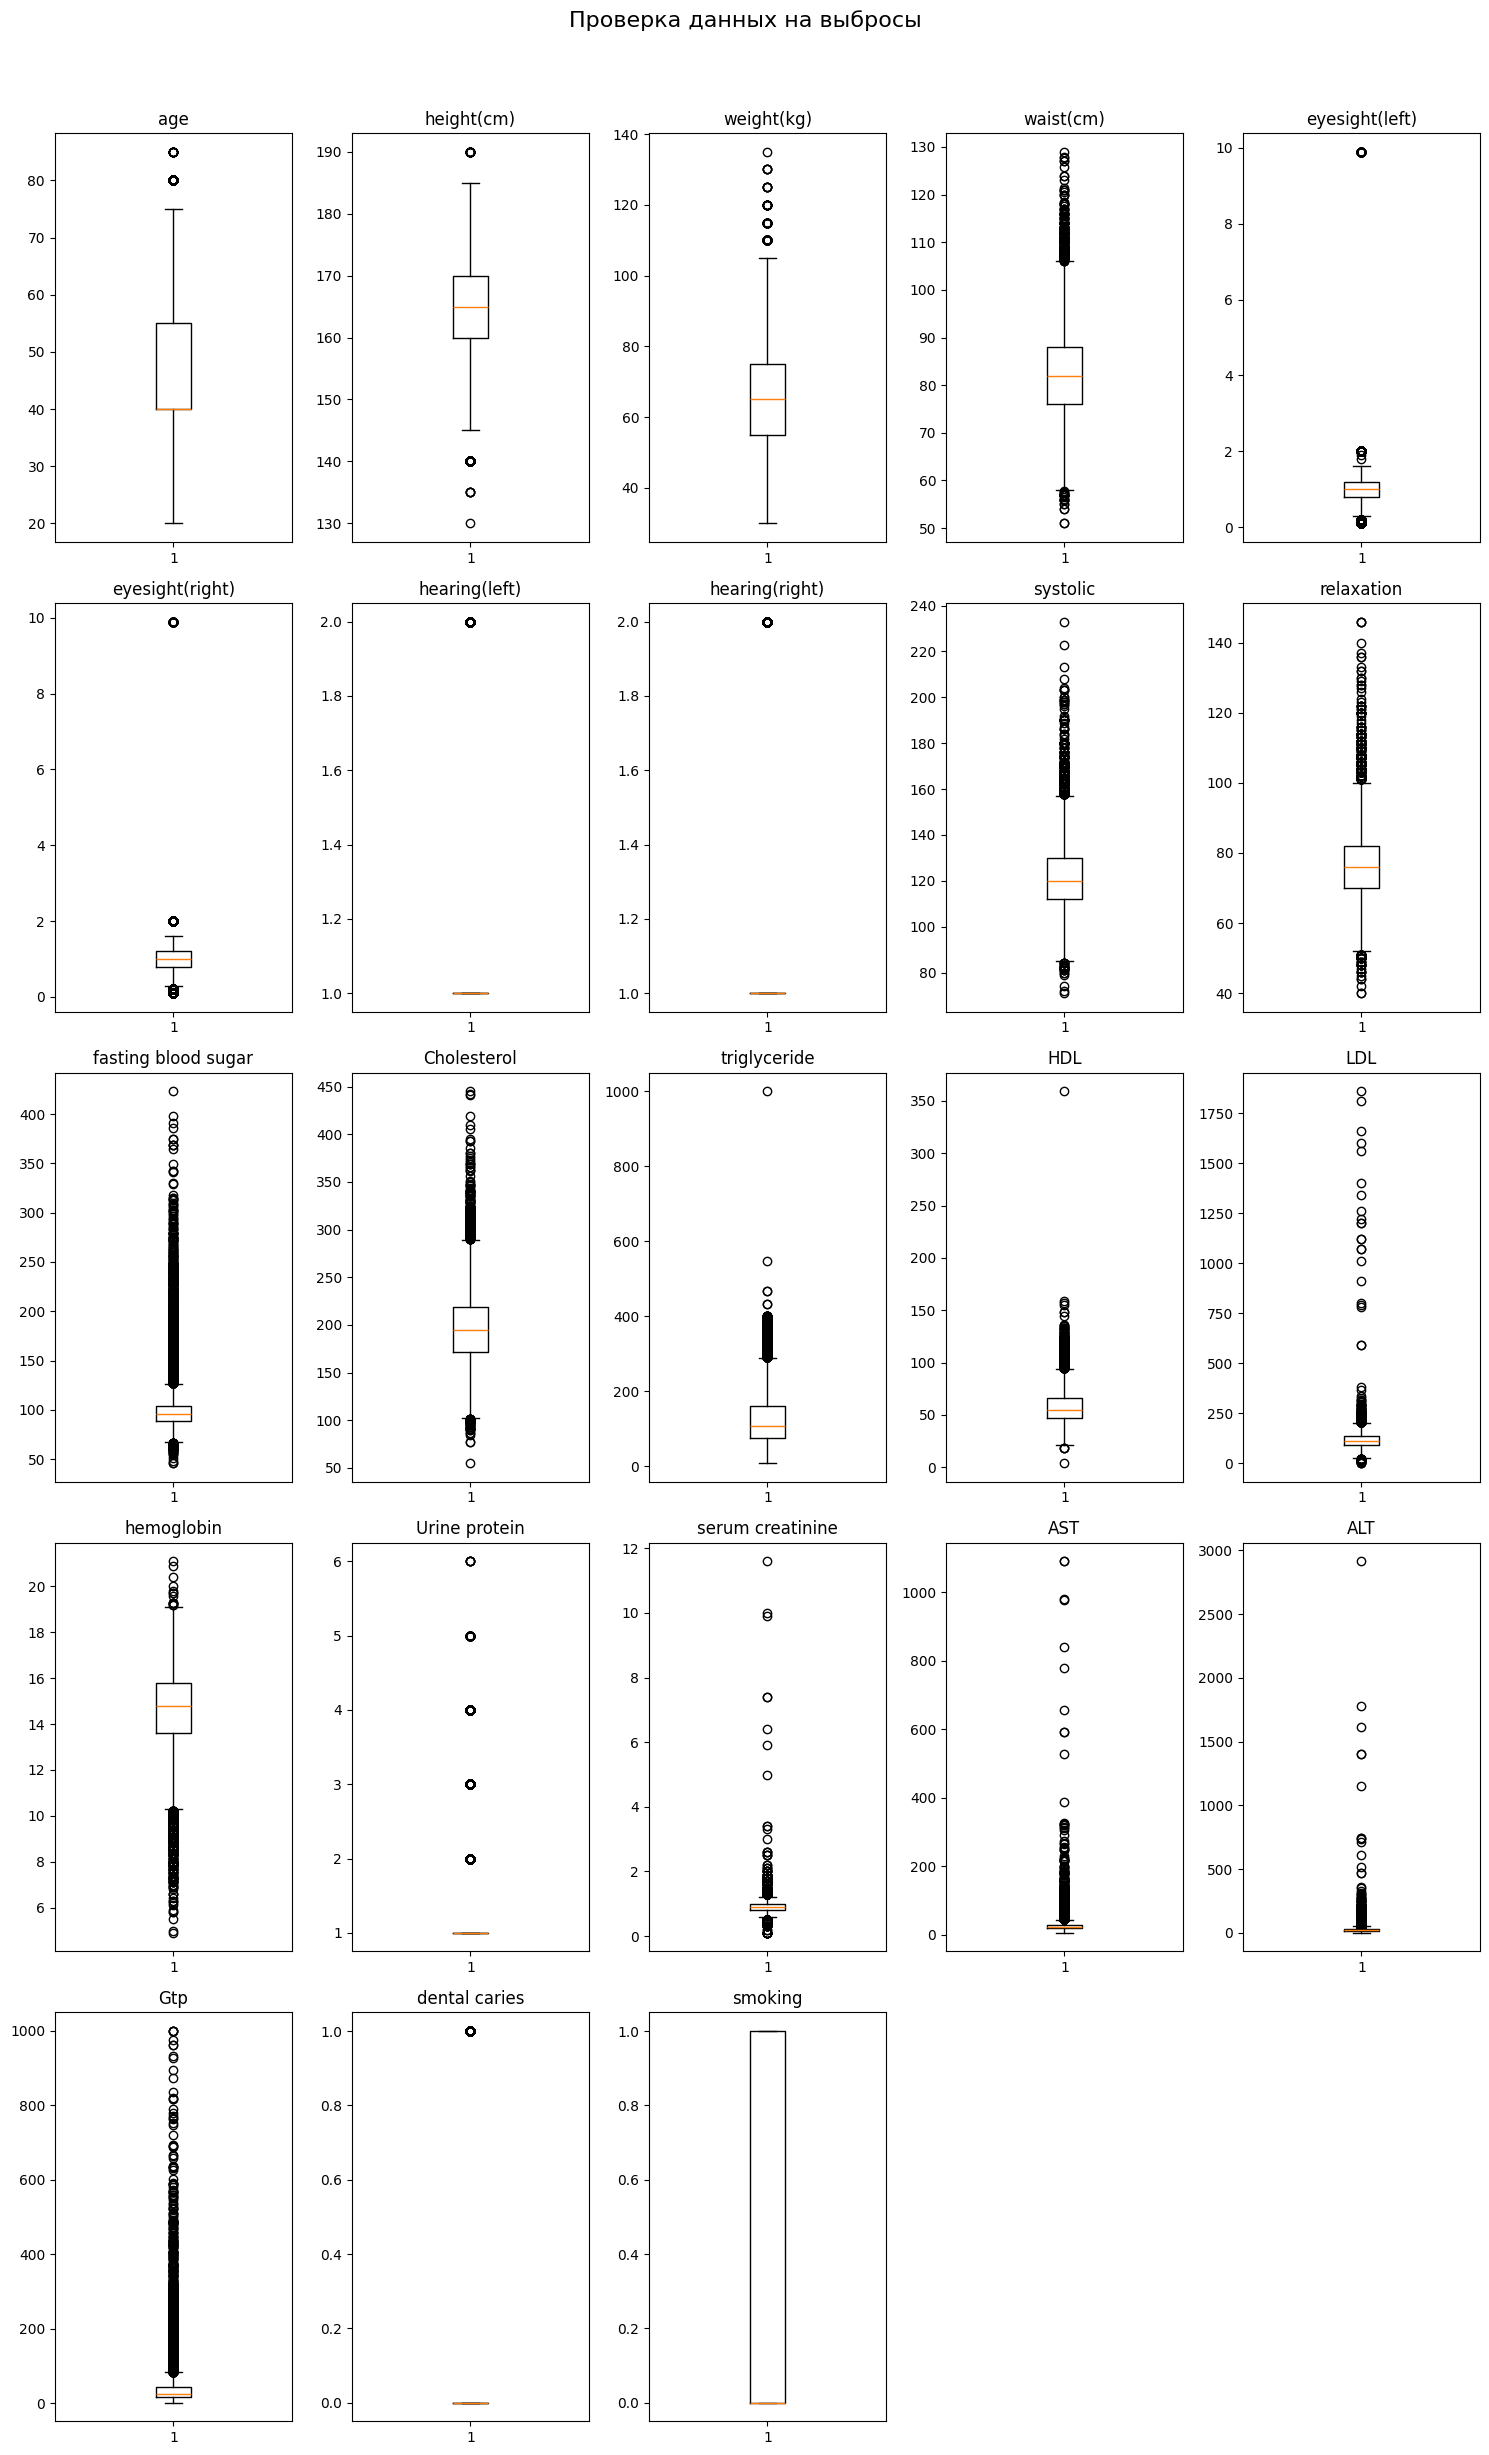

In [9]:
n = len(col_num)
ncols = 5  # Количество столбцов в сетке
nrows = (n + ncols - 1) // ncols  # Количество строк

# Создание фигуры и подграфиков
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()  # Преобразование в одномерный массив для удобства

# Создание boxplot для каждого числового столбца
for i, column in enumerate(col_num):
    axes[i].boxplot(data[column])
    axes[i].set_title(column)  # Заголовок для каждого графика

# Удаление пустых подграфиков, если они есть
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Проверка данных на выбросы", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Автоматическая настройка отступов
plt.show()  # Отображение графиков

### Признаки относительно целевого признака

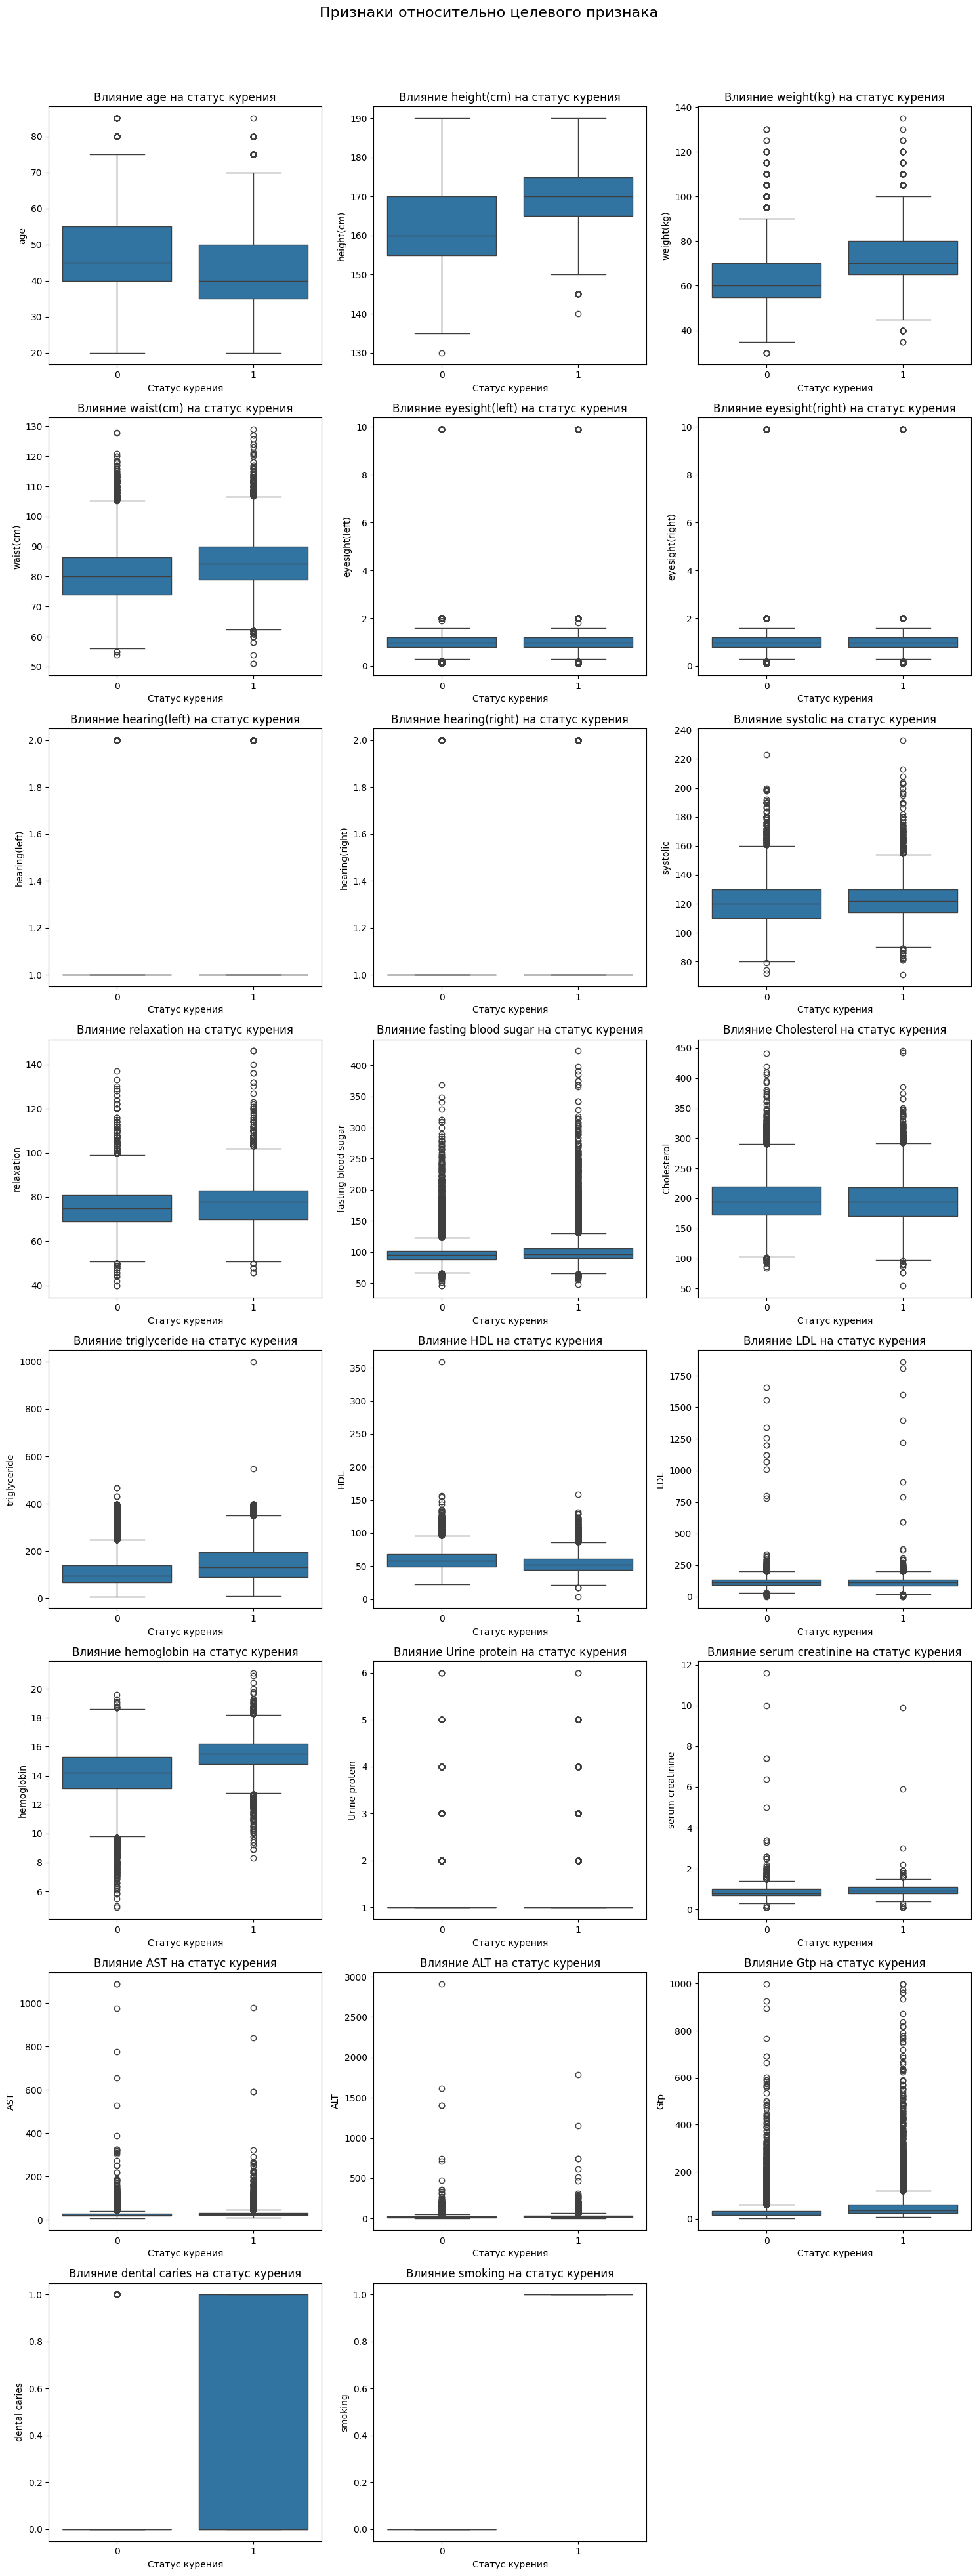

In [10]:
n = len(col_num)
ncols = 3  # Количество столбцов в сетке
nrows = (n + ncols - 1) // ncols  # Количество строк

# Создание фигуры и подграфиков
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()  # Преобразование в одномерный массив для удобства

for i, feature in enumerate(col_num):
    sns.boxplot(x='smoking', y=feature, data=data, ax=axes[i])  # Указываем ось для каждого графика
    axes[i].set_title(f'Влияние {feature} на статус курения')
    axes[i].set_xlabel('Статус курения')
    axes[i].set_ylabel(feature)

# Убираем пустые подграфики, если они есть
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Признаки относительно целевого признака", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Видим, что в некоторых данных имеются выбросы. Пока их трогать не будем, посмотрим как с ними поведет себя модель.

### Построим матрицу корреляции

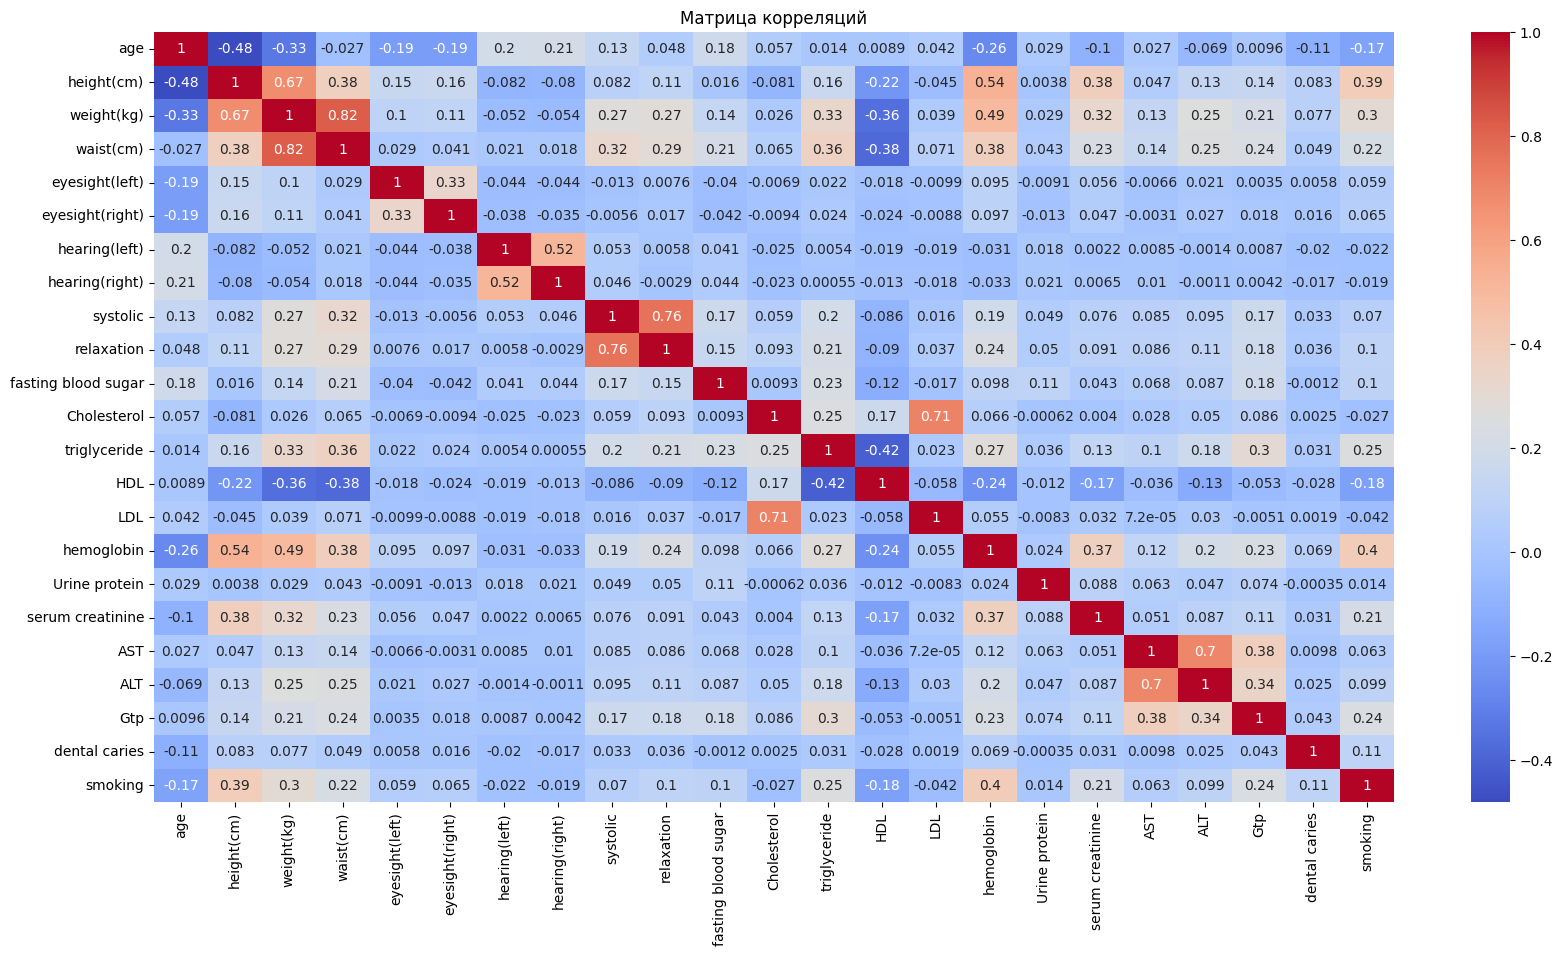

In [11]:
corr = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Матрица корреляций")
plt.show()

Видим хорошую корреляцию между Cholesterol и LDL, relaxation и systolic, waist(cm) и weight(kg), AST и ALT.

## Подготовка данных к моделированию

### Поделим нашу таблицу на тренировочную и тестовую в соотношении 80/20

In [12]:
X = data.drop('smoking', axis=1)
y = data['smoking']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Размер тренировочной выборки (признаки):', X_train.shape)
print('Размер тестовой выборки (признаки):', X_test.shape)
print('Размер тренировочной выборки (целевой признак):', y_train.shape)
print('Размер тестовой выборки (целевой признак):', y_test.shape)

Размер тренировочной выборки (признаки): (31187, 22)
Размер тестовой выборки (признаки): (7797, 22)
Размер тренировочной выборки (целевой признак): (31187,)
Размер тестовой выборки (целевой признак): (7797,)


### Напишем функцию для подбора гиперпараметров и подсчета метрик

In [ ]:
# Функция подбора гиперпараметров. Используем RandomizedSearchCV для скорости обучения
def tune_hyperparameters(model, param_grid, X_train, y_train, cv=5, scoring='accuracy', n_iter=30):

    rand_search = RandomizedSearchCV(model, param_grid, cv=cv, scoring=scoring, n_jobs=-1, n_iter=n_iter, random_state=42)
    rand_search.fit(X_train, y_train)
    
    print(f"Лучшие гиперпараметры для {model}: {rand_search.best_params_}")
    
    return rand_search.best_estimator_

# Функция подсчета метрик
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    metrics = {
        "Accuracy": round(accuracy_score(y_test, y_pred), 3),
        "Precision": round(precision_score(y_test, y_pred, average='weighted'), 3),
        "Recall": round(recall_score(y_test, y_pred, average='weighted'), 3),
        "F1 Score": round(f1_score(y_test, y_pred, average='weighted'), 3),
        "ROC AUC": round(roc_auc_score(y_test, y_prob, multi_class='ovr'), 3) if y_prob is not None else None
    }
    
    return metrics, y_pred, y_prob

# Функция визуализации ROC кривой
def plot_roc_curve(y_test, y_prob, model):
    if y_prob is None:
        print(f"ROC curve not available for {model} (no probability estimates).")
        return
    
    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=y_test.max())
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC Curve ({model})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model}')
    plt.legend()
    plt.show()

# Функция визуализации матрицы ошибок с нормализацией    
def plot_confusion_matrix(y_test, y_pred, model):
    cm = confusion_matrix(y_test, y_pred, normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model}')
    plt.show()

# Функция визуализации важности признаков    
def plot_feature_importance(model, X, model_name):
    if hasattr(model, "feature_importances_"):
        feature_imp = pd.DataFrame(
            sorted(zip(model.feature_importances_, X.columns)),
            columns=['Важность признака', 'Признак']
        )
        plt.figure(figsize=(10, 10))
        sns.barplot(x="Важность признака", y="Признак", data=feature_imp.sort_values(by="Важность признака", ascending=False))
        plt.title(f'Важность признака для {model_name}')
        plt.tight_layout()
        plt.grid()
        plt.show()
    else:
        print("Модель не поддерживает feature_importances_")

## DecisionTreeClassifier

In [14]:
%%time

param_grid_dt = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [None] + [i for i in range(1, 31, 5)],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

model_dt = DecisionTreeClassifier(random_state=42)     
best_model_dt = tune_hyperparameters(model_dt, param_grid_dt, X_train, y_train)
metrics_dt, y_pred_dt, y_prob_dt = evaluate_model(best_model_dt, X_test, y_test)


Лучшие гиперпараметры для DecisionTreeClassifier(random_state=42): {'min_samples_split': 6, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'entropy'}
CPU times: total: 1.25 s
Wall time: 6.29 s


In [15]:
# Подсчет метрик
df_metrics_dt = pd.DataFrame([metrics_dt])
df_metrics_dt

,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,0.728,0.728,0.728,0.728,0.731


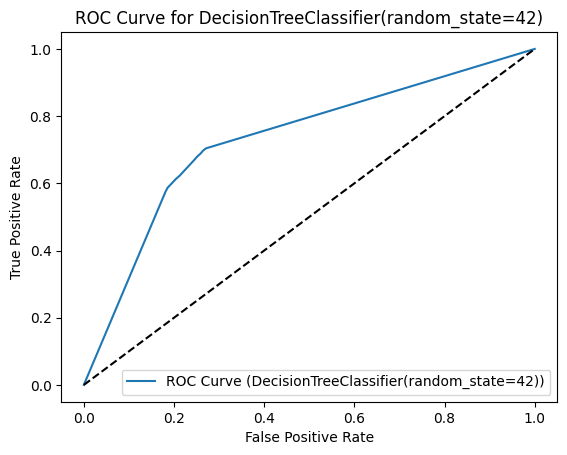

In [16]:
plot_roc_curve(y_test, y_prob_dt, model_dt)

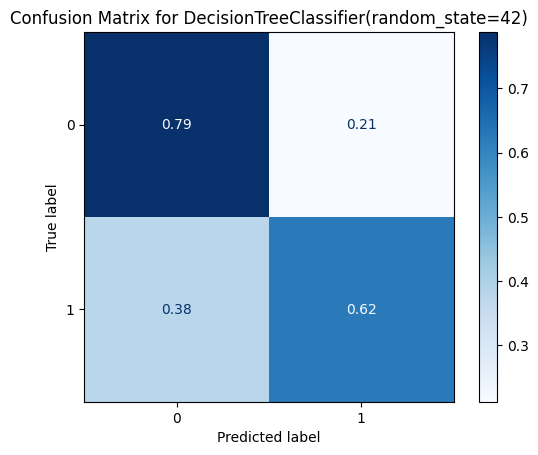

In [17]:
plot_confusion_matrix(y_test, y_pred_dt, model_dt)

По Матрице ошибок видна следующая картина:

- True Positive (истинно-положительное решение): человек не курит и модель это предсказала (Предсказания 0 : Целевые значения 0) - 78%
- False Positive (ложноположительное решение): ошибка 1-го рода, ML-модель предсказала что человек курит, а на самом деле нет (Предсказания 1 : Целевые значения 0) - 22%
- False Negative (ложноотрицательное решение): ошибка 2-го рода – ML-модель предсказала, что человек не курит, но на самом деле курит (Предсказания 0 : Целевые значения 1) - 34%
- True Negative (истинно-отрицательное решение): человек курит и прогноз модели это предсказал (Предсказания 1 : Целевые значения 1) - 66%

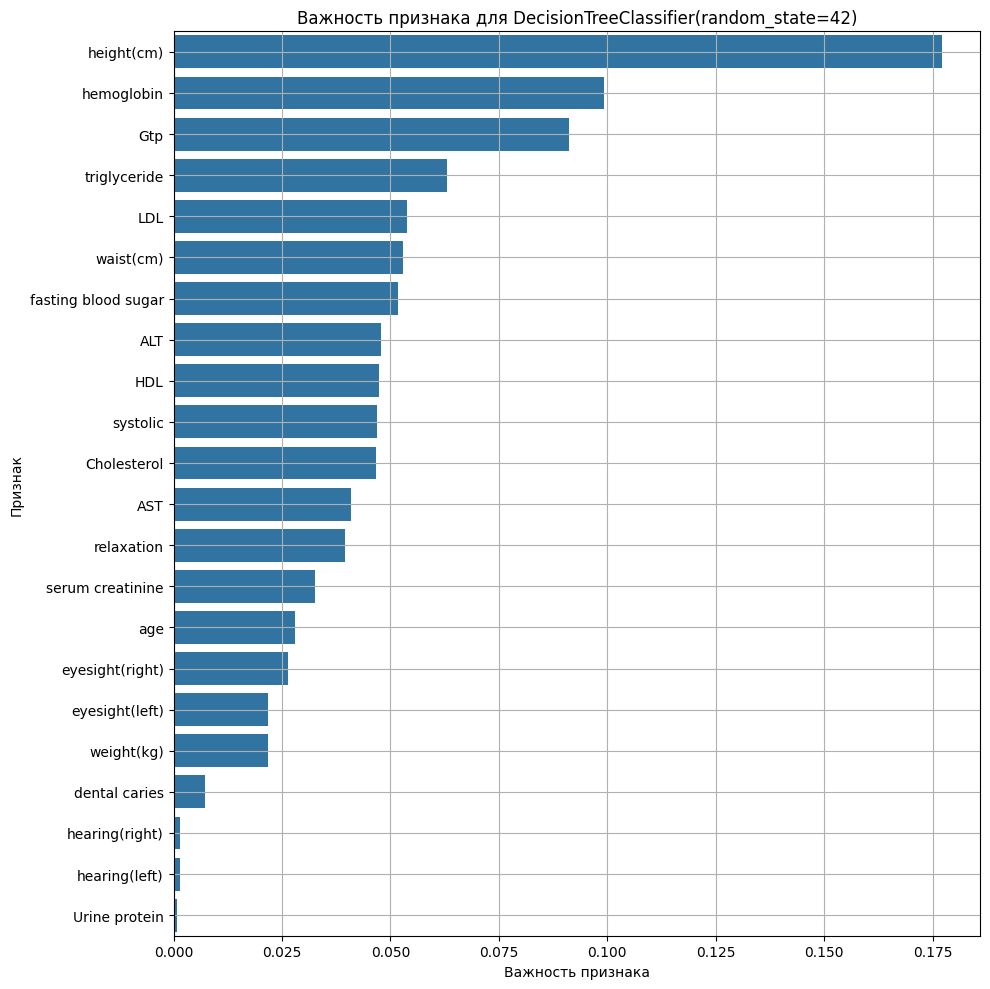

In [18]:
plot_feature_importance(best_model_dt, X_train, model_dt)

## RandomForestClassifier

In [19]:
%%time

param_grid_rf = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [None] + [i for i in range(1, 21, 5)],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'ccp_alpha': [0.01, 0.03, 0.05],
    'n_estimators': [i for i in range(50, 201, 50)]
}

model_rf = RandomForestClassifier(random_state=42)     
best_model_rf = tune_hyperparameters(model_rf, param_grid_rf, X_train, y_train)
metrics_rf, y_pred_rf, y_prob_rf = evaluate_model(best_model_rf, X_test, y_test)

Лучшие гиперпараметры для RandomForestClassifier(random_state=42): {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 11, 'criterion': 'entropy', 'ccp_alpha': 0.01}
CPU times: total: 2.94 s
Wall time: 1min 1s


In [20]:
# Подсчет метрик
df_metrics_rf = pd.DataFrame([metrics_rf])
df_metrics_rf

,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,0.718,0.711,0.718,0.712,0.792


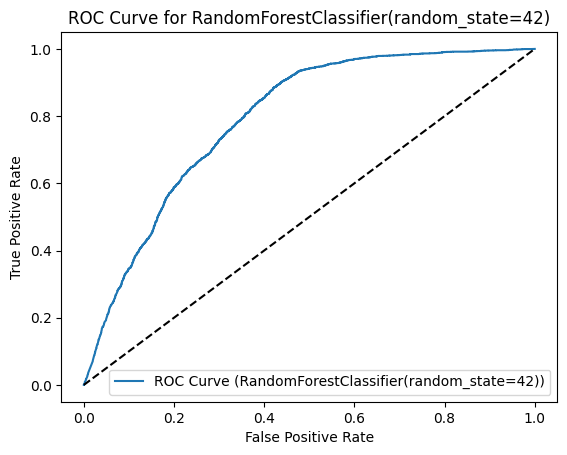

In [21]:
plot_roc_curve(y_test, y_prob_rf, model_rf)

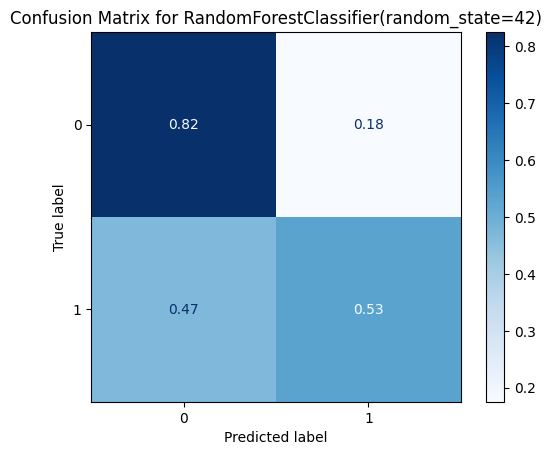

In [22]:
plot_confusion_matrix(y_test, y_pred_rf, model_rf)

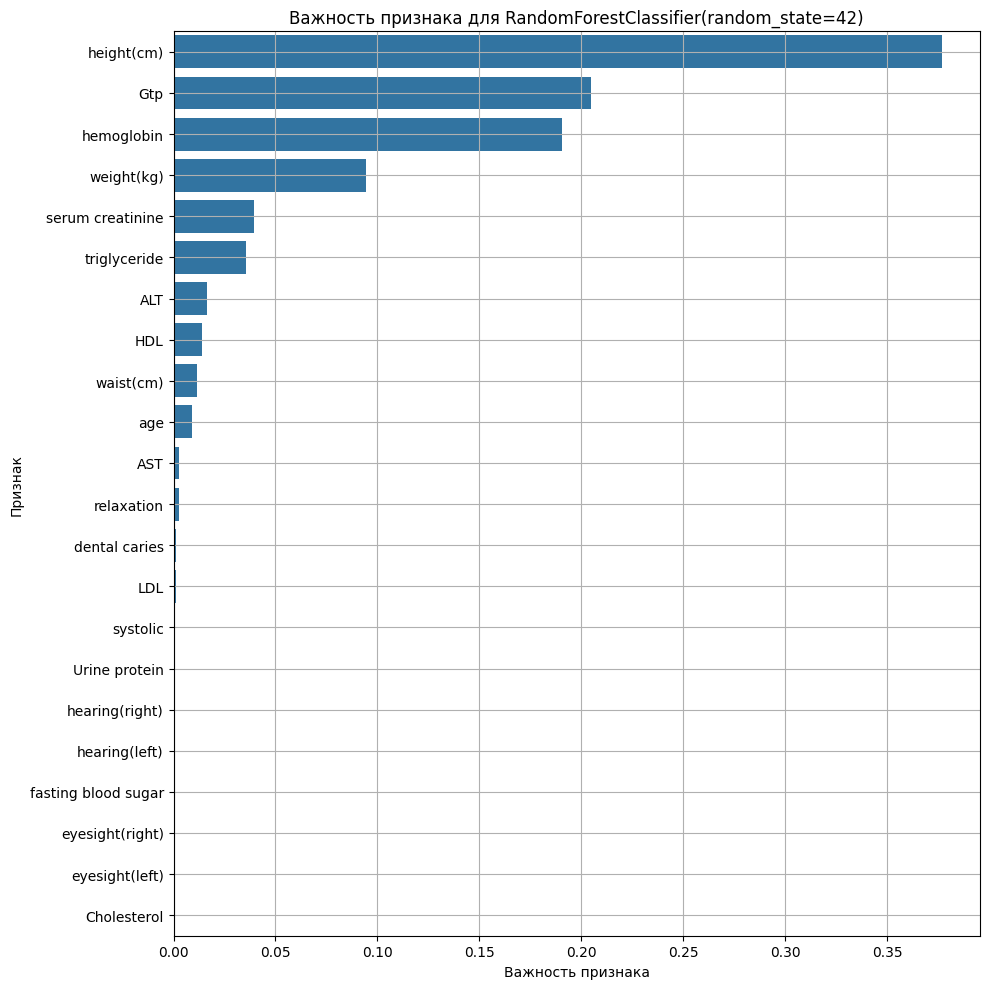

In [23]:
plot_feature_importance(best_model_rf, X_train, model_rf)

## AdaBoostClassifier

In [24]:
%%time

param_grid_ab = {
    'learning_rate': [0.1, 0.3, 0.5, 0.7, 1.0],
    'n_estimators': [i for i in range(50, 201, 50)]
}

model_ab = AdaBoostClassifier(random_state=42)     
best_model_ab = tune_hyperparameters(model_ab, param_grid_ab, X_train, y_train)
metrics_ab, y_pred_ab, y_prob_ab = evaluate_model(best_model_ab, X_test, y_test)

Лучшие гиперпараметры для AdaBoostClassifier(random_state=42): {'n_estimators': 200, 'learning_rate': 1.0}
CPU times: total: 6.19 s
Wall time: 42.5 s


In [25]:
# Подсчет метрик
df_metrics_ab = pd.DataFrame([metrics_ab])
df_metrics_ab

,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,0.743,0.745,0.743,0.744,0.822


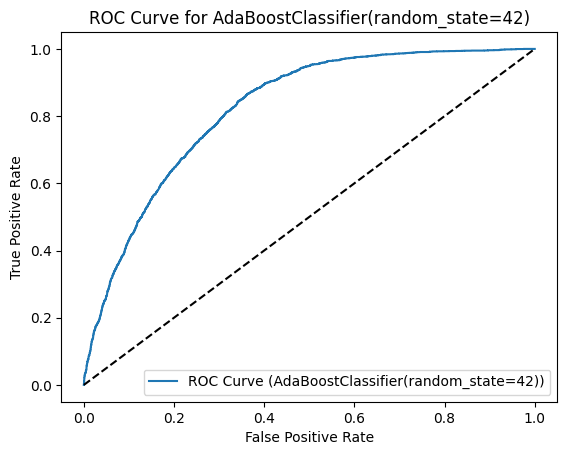

In [26]:
plot_roc_curve(y_test, y_prob_ab, model_ab)

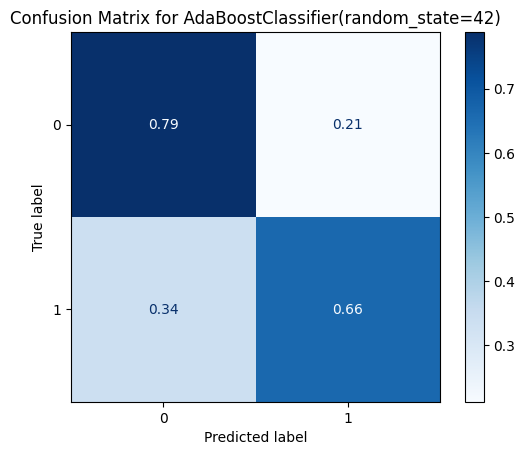

In [27]:
plot_confusion_matrix(y_test, y_pred_ab, model_ab)

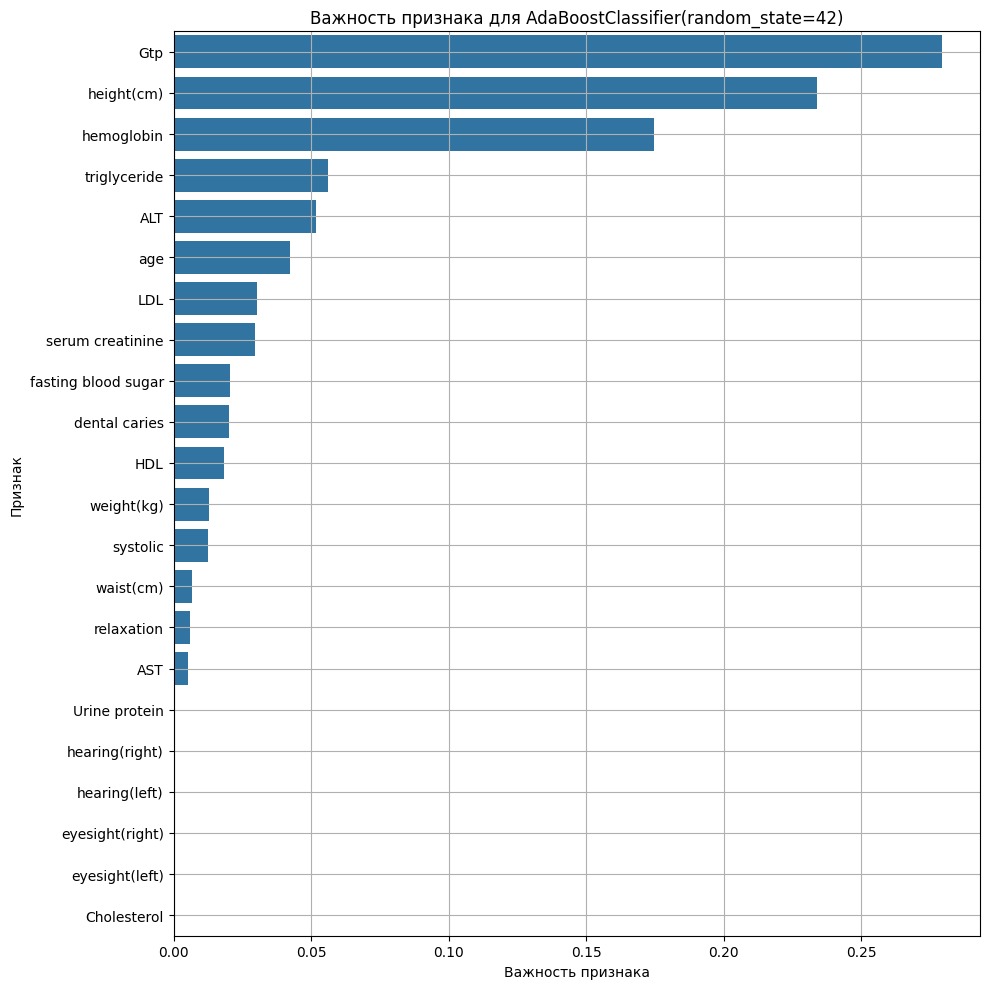

In [28]:
plot_feature_importance(best_model_ab, X_train, model_ab)

## GradientBoostingClassifier

In [29]:
%%time

param_grid_gb = {
    'learning_rate': [0.1, 0.3, 0.5, 0.7, 1.0],
    'n_estimators': [i for i in range(50, 201, 50)],
    'max_depth': [None] + [i for i in range(1, 31, 5)],
    'criterion' : ['friedman_mse', 'squared_error'],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'ccp_alpha': [0.01, 0.03, 0.05]
}

model_gb = GradientBoostingClassifier(random_state=42)     
best_model_gb = tune_hyperparameters(model_gb, param_grid_gb, X_train, y_train)
metrics_gb, y_pred_gb, y_prob_gb = evaluate_model(best_model_gb, X_test, y_test)

Лучшие гиперпараметры для GradientBoostingClassifier(random_state=42): {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 1, 'learning_rate': 1.0, 'criterion': 'squared_error', 'ccp_alpha': 0.01}
CPU times: total: 4.78 s
Wall time: 6min 14s


In [30]:
# Подсчет метрик
df_metrics_gb = pd.DataFrame([metrics_gb])
df_metrics_gb

,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,0.721,0.716,0.721,0.718,0.766


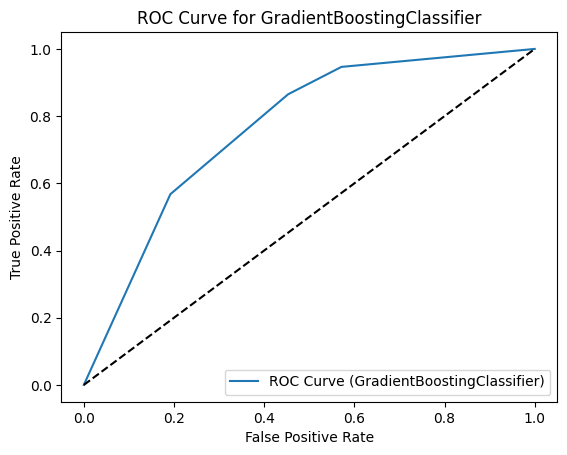

In [31]:
plot_roc_curve(y_test, y_prob_gb, model='GradientBoostingClassifier')

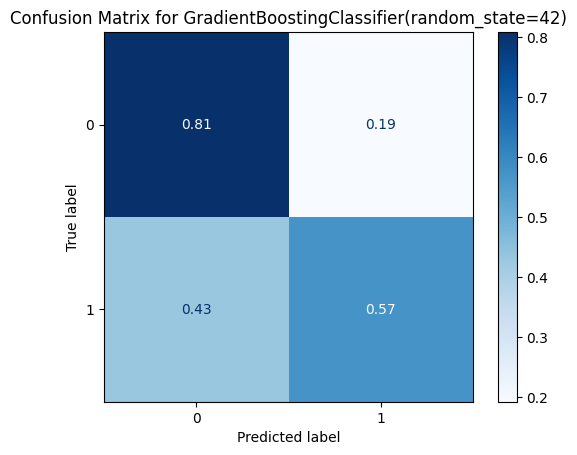

In [32]:
plot_confusion_matrix(y_test, y_pred_gb, model_gb)

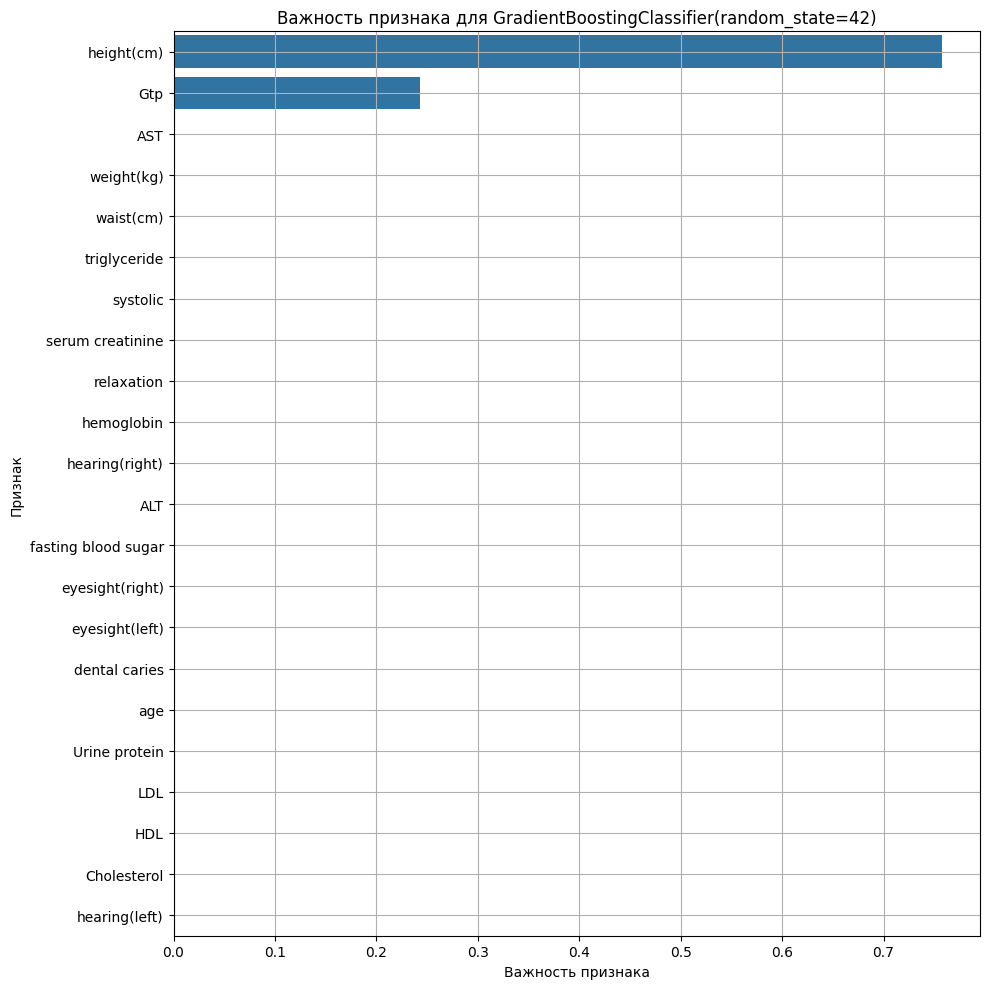

In [33]:
plot_feature_importance(best_model_gb, X_train, model_gb)

## CatBoostClassifier

In [ ]:
%%time

param_grid_cb = {
    'learning_rate': [0.01, 0.1, 0.3],
    'iterations': [i for i in range(100, 201, 50)],
    'depth': [None] + [i for i in range(1, 21, 5)],
    'l2_leaf_reg': [1, 5, 9],
    'auto_class_weights': ['Balanced', None]
}

model_cb = CatBoostClassifier(random_state=42, verbose=0)     
best_model_cb = tune_hyperparameters(model_cb, param_grid_cb, X_train, y_train)
metrics_cb, y_pred_cb, y_prob_cb = evaluate_model(best_model_cb, X_test, y_test)

In [ ]:
# Подсчет метрик
df_metrics_cb = pd.DataFrame([metrics_cb])
df_metrics_cb

,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,0.788,0.796,0.788,0.79,0.868


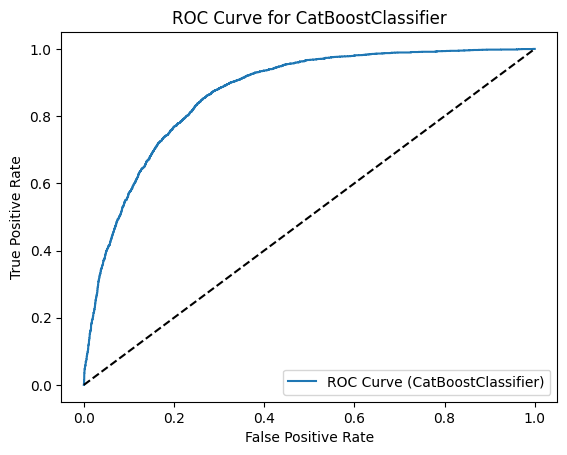

In [ ]:
plot_roc_curve(y_test, y_prob_cb, model='CatBoostClassifier')

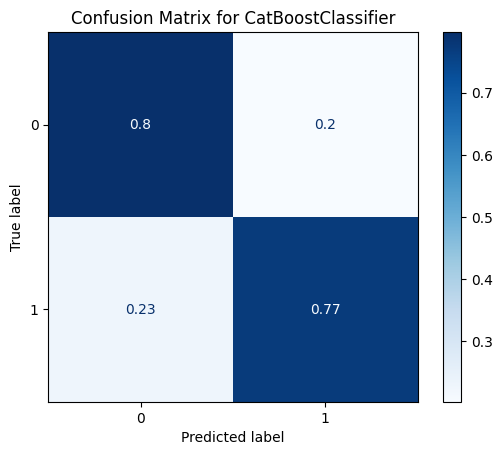

In [ ]:
plot_confusion_matrix(y_test, y_pred_cb, model='CatBoostClassifier')

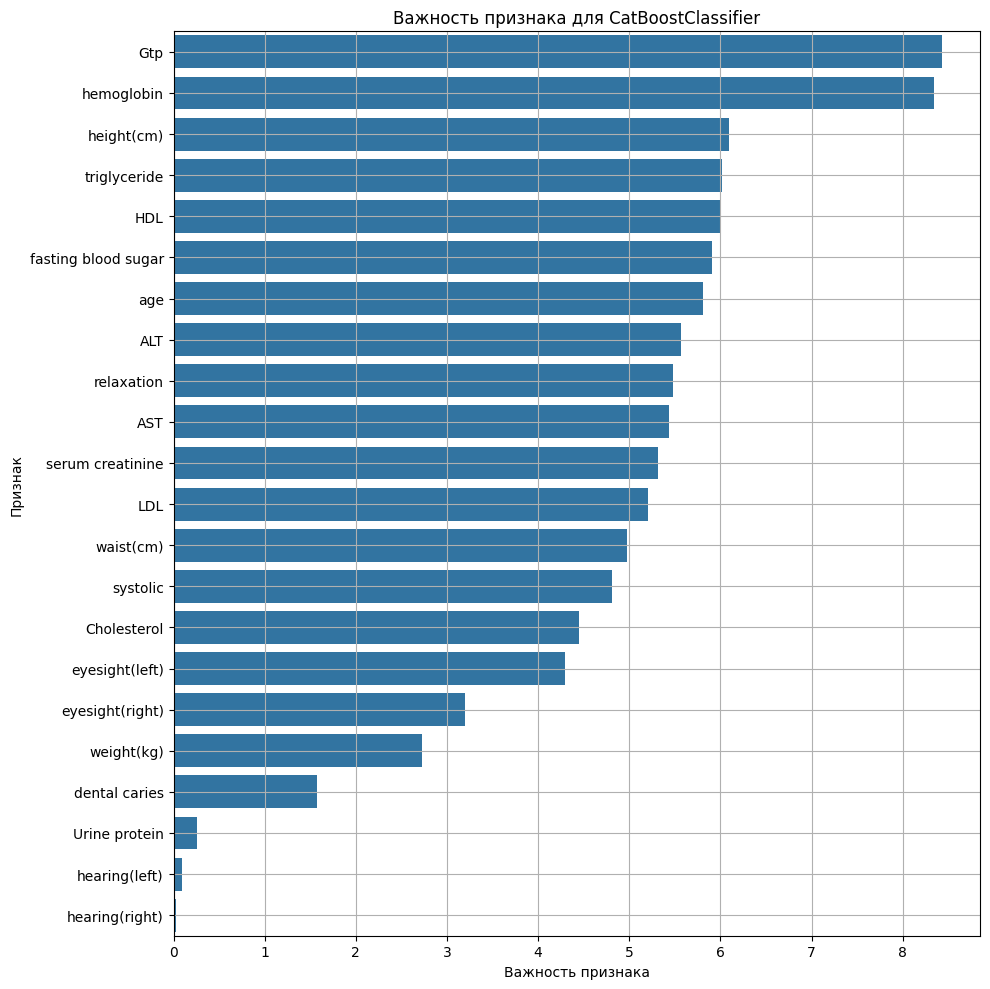

In [ ]:
plot_feature_importance(best_model_cb, X_train, model_name='CatBoostClassifier')

## XGBClassifier

In [ ]:
%%time

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [None] + [i for i in range(1, 31, 5)],
    'n_estimators': [50, 100, 200],
    'gamma': [0, 0.25, 1.0]
}

model_xgb = XGBClassifier(random_state=42, 
                          objective='binary:logistic',
                          use_label_encoder=False, 
                          eval_metric='mlogloss'
                        )     
best_model_xgb = tune_hyperparameters(model_xgb, param_grid_xgb, X_train, y_train)
metrics_xgb, y_pred_xgb, y_prob_xgb = evaluate_model(best_model_xgb, X_test, y_test)

Лучшие гиперпараметры для XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...): {'n_estimators': 50, 'max_depth': 16, 'learning_rate': 0.1, 'gamma': 0.25}
CPU times: total: 18 s
Wall time: 1min 39s


In [ ]:
# Подсчет метрик
df_metrics_xgb = pd.DataFrame([metrics_xgb])
df_metrics_xgb

,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,0.798,0.8,0.798,0.799,0.877


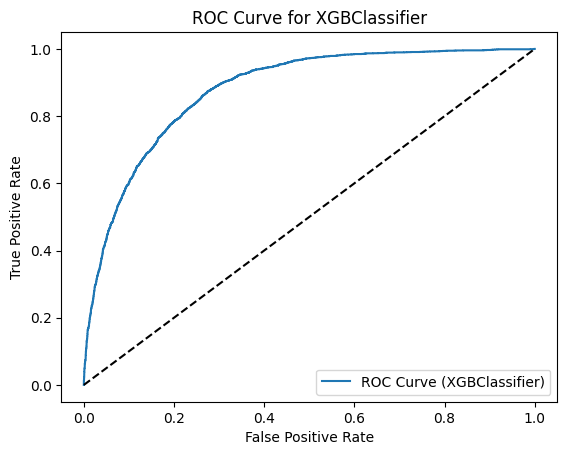

In [ ]:
plot_roc_curve(y_test, y_prob_xgb, model='XGBClassifier')

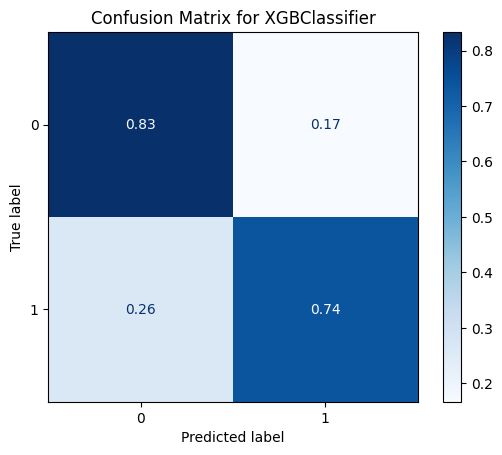

In [ ]:
plot_confusion_matrix(y_test, y_pred_xgb, model='XGBClassifier')

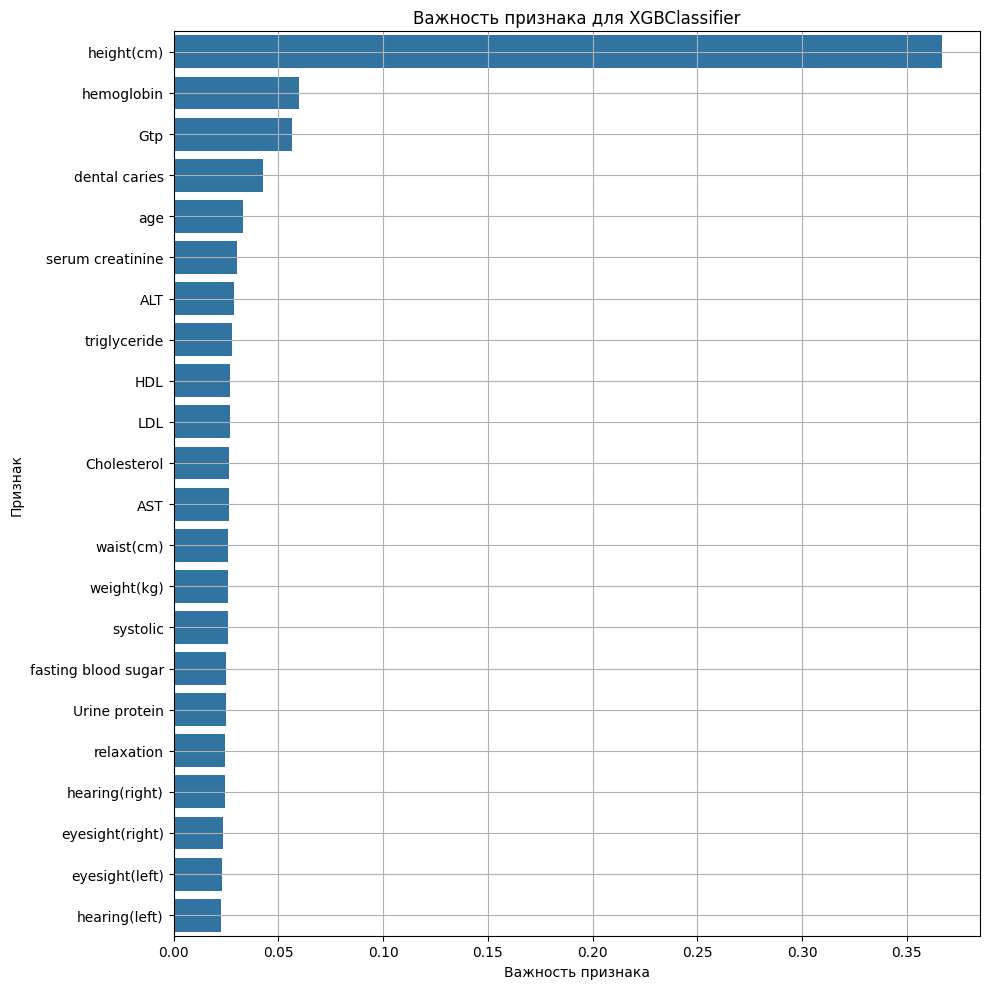

In [ ]:
plot_feature_importance(best_model_xgb, X_train, model_name='XGBClassifier')

## Общая таблица полученных метрик качества

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(
    {'Метрики': [metrics_dt, 
                 metrics_rf,
                 metrics_ab,
                 metrics_gb,
                 metrics_cb,
                 metrics_xgb]
    },
    index=['DecisionTreeClassifier', 
           'RandomForestClassifier', 
           'AdaBoostClassifier', 
           'GradientBoostingClassifier', 
           'CatBoostClassifier', 
           'XGBClassifier']
)

,Метрики
DecisionTreeClassifier,"{'Accuracy': 0.728, 'Precision': 0.728, 'Recall': 0.728, 'F1 Score': 0.728, 'ROC AUC': 0.731}"
RandomForestClassifier,"{'Accuracy': 0.718, 'Precision': 0.711, 'Recall': 0.718, 'F1 Score': 0.712, 'ROC AUC': 0.792}"
AdaBoostClassifier,"{'Accuracy': 0.743, 'Precision': 0.745, 'Recall': 0.743, 'F1 Score': 0.744, 'ROC AUC': 0.822}"
GradientBoostingClassifier,"{'Accuracy': 0.721, 'Precision': 0.716, 'Recall': 0.721, 'F1 Score': 0.718, 'ROC AUC': 0.766}"
CatBoostClassifier,"{'Accuracy': 0.788, 'Precision': 0.796, 'Recall': 0.788, 'F1 Score': 0.79, 'ROC AUC': 0.868}"
XGBClassifier,"{'Accuracy': 0.798, 'Precision': 0.8, 'Recall': 0.798, 'F1 Score': 0.799, 'ROC AUC': 0.877}"


Лучшая модель - `XGBClassifier` с метриками **{'Accuracy': 0.798, 'Precision': 0.8, 'Recall': 0.798, 'F1 Score': 0.799, 'ROC AUC': 0.877}** и гиперпараметрами: **{'n_estimators': 50, 'max_depth': 16, 'learning_rate': 0.1, 'gamma': 0.25}**. 